# Homework 1

## Utilities

In [1]:
import networkx as nx
import random

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def pdf_degrees(G):
    """computes the probability density function of degrees of G"""

    degrees = [ G.degree[v] for v in G.nodes ]
    minimum, maximum = min(degrees), max(degrees)

    pdf = np.zeros(maximum - minimum + 1)

    for d in degrees:
        pdf[d - minimum] += 1

    return np.arange(minimum, maximum + 1), pdf

def build_graph_with_probability_function(f, N):
    """
    builds a graph with N vertices and for every vertices (i, j)
    where i<j add an edge with probability f(G, i, j)
    """
    G = nx.Graph()
    G.add_nodes_from(range(N))

    for i in range(N):
        for j in range(i + 1, N):
            p = random.random()
            prob = f(G, i, j)
            
            if p <= prob:
                G.add_edge(i, j)
    return G

def mean_degree(G):
    return sum([ G.degree[v] for v in G.nodes ])/G.number_of_nodes()

def plot_linear_and_log(x, y, log_xscale = 'linear'):
    fig, (ax, ax_log) = plt.subplots(1, 2, figsize=(20, 10))
    
    ax.plot(x, y)
    ax_log.plot(x, y)
    
    ax_log.set(
        xlabel='degree',
        ylabel='number of nodes',
        title ='linear'
    )

    ax_log.set(
        xlabel='degree',
        ylabel='number of nodes',
        yscale='log',
        xscale=log_xscale,
        title ='log'
    )

    ax.grid()
    ax_log.grid()

    plt.show()

## Exercise 1

mean degree:  3.9826


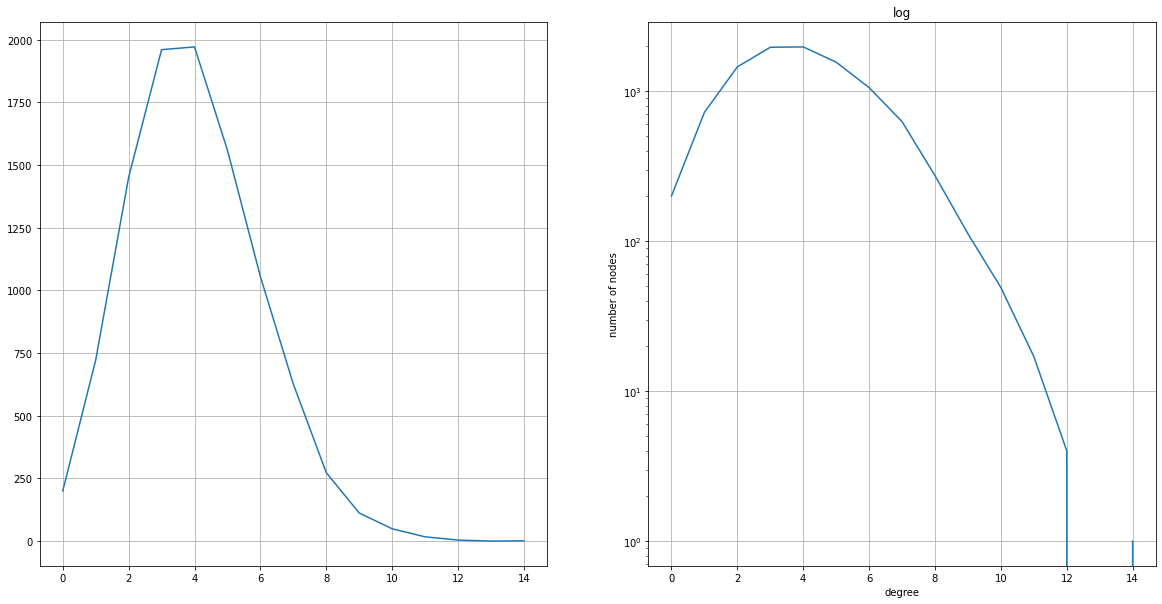

In [2]:
def exercise_1():
    N = 10000
    f = lambda G, i, j : 4./G.number_of_nodes()

    G = build_graph_with_probability_function(f, N)
    print('mean degree: ', mean_degree(G))
    
    x, y = pdf_degrees(G)
    
    plot_linear_and_log(x, y)

exercise_1()

## Exercise 2

mean degree:  1.968


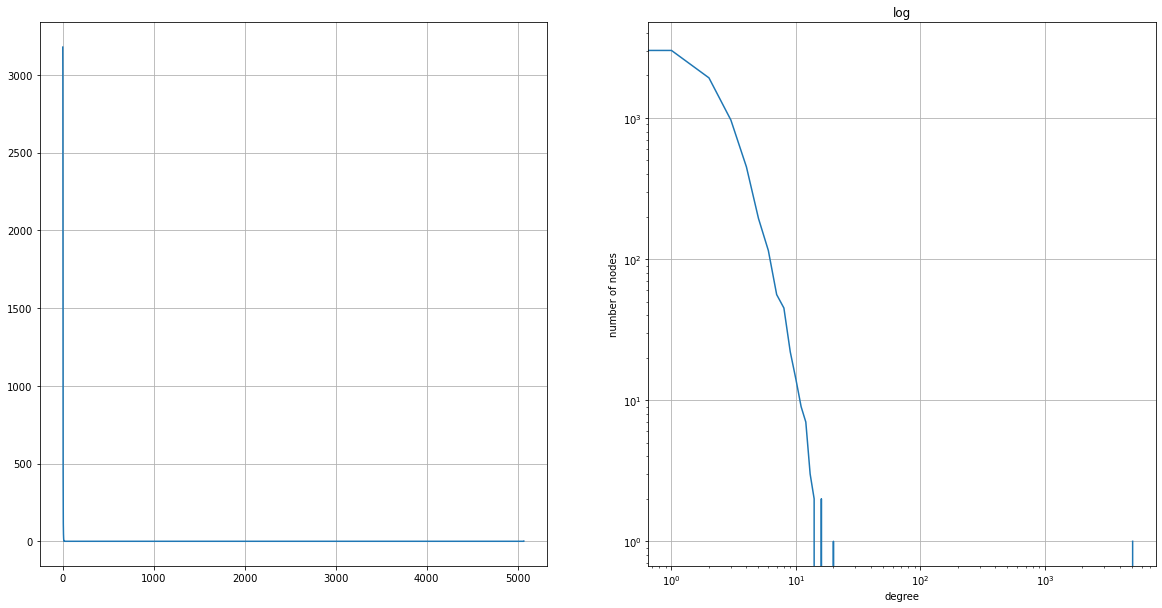

In [3]:
class ProbFunc:
    
    def __init__(self):
        self.sum_l = 0
        self.sum_r = 0
        self.i     = 0
        
    def summation(self, G, i, j):
        if self.i != i:
            self.sum_l += G.degree[self.i]
            self.i = i
            self.sum_r = 0

        if j-1 != i:
            self.sum_r += G.degree[j-1]

        return self.sum_l + G.degree[i] + self.sum_r

    def __call__(self, G, i, j):
        epsilon = 0.00001
        q = 4./3.
        
        summatory = self.summation(G, i, j)
        s = summatory + (j + 1)*epsilon
        return (G.degree[i] + epsilon) / s

def prob_func_naive(G, i, j):
    epsilon = 0.00001
    q = 4./3.
    
    summatory = sum(G.degree[v] for v in range(j))
    s = summatory + (j + 1)*epsilon
    return (G.degree[i] + epsilon) / s

def exercise_2():
    N = 10000

    G = build_graph_with_probability_function(ProbFunc(), N)
    print('mean degree: ', mean_degree(G))
    
    x, y = pdf_degrees(G)
    
    plot_linear_and_log(x, y, log_xscale='log')

exercise_2()